In [1]:
### API can be found in beaf/doc/index.html


### read information from a brw file

# import the file brw_experiment_settings from beaf framework, used to read information from brw files
import beaf.brw_experiment_settings as be

# create an object Info containing the information from the recording
# this does not extract any traces from the recording
Info = be.get_brw_experiment_setting("../recordings/13-10_hippo-slice3_gabazine17.brw")

# access and print information stored in the Info object
print("MEA model:", Info.get_mea_model())
print("recording type:", Info.get_recording_type())
print("number of channels in the recording:", Info.get_nb_channel())
print("sampling rate:", Info.get_sampling_rate())
print("number of frame in the recording:", Info.get_recording_length())
print("recording length:", Info.get_recording_length_sec())

MEA model: Accura_3D
recording type: RawDataSettings
number of channels in the recording: 4096
sampling rate: 5543.99560546875
number of frame in the recording: 44352
recording length: 8.000006341319962


In [3]:
### read a recording from a brw file

# import the file brw_recording from beaf framework, used to read and extract recordings from brw files
import beaf.brw_recording as br

## raw format

# extract a recording from the brw file, from 1s to 7s, extracting the channels 1192 and 1255
Recording = br.read_brw_recording("../recordings/13-10_hippo-slice3_gabazine17.brw", t_start=1, t_end=7, ch_to_extract=[1192, 1255], verbose=True)

# a Recording object also contains an Info object
print("Recording type:", Recording.Info.get_recording_type())
# Note: Recording.Info.get_recording_length() and Recording.Info.get_recording_length_sec()
#       contain the brw file recording length, not the extracted recording length


# directly access recording date from the Recording object

# recording[0] contains data for the first extracted channel
data_channel_1192 = Recording.recording[0]
# recording[1] contains data for the second extracted channel
data_channel_1255 = Recording.recording[1]

# recording[0][0] contains the id number of the first extracted channel
print("channel number:", data_channel_1192[0])
# recording[0][1] contains time series data of the first extracted channel
print("number of frames in the recording:", len(data_channel_1192[1]))
# the extracted recording length can be obtained by dividing the number of frames in the recording by the sampling rate
print("extracted recording length:", len(data_channel_1192[1])/Recording.Info.get_sampling_rate(), "seconds")
# recording[0][2] contains a list of the first and last time frame of the recording for first extracted channel
print("recording data from frame", data_channel_1192[2][0][0], "to frame", data_channel_1192[2][0][1])

Reading chunk 2 out of 2
done
Recording type: RawDataSettings
channel number: 1192
number of frames in the recording: 33265
extracted recording length: 6.000185131313324 seconds
recording data from frame 5543 to frame 38807


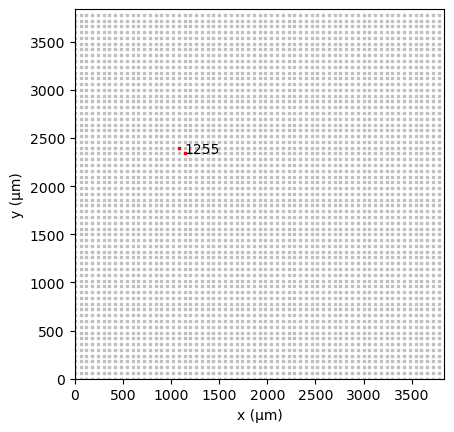

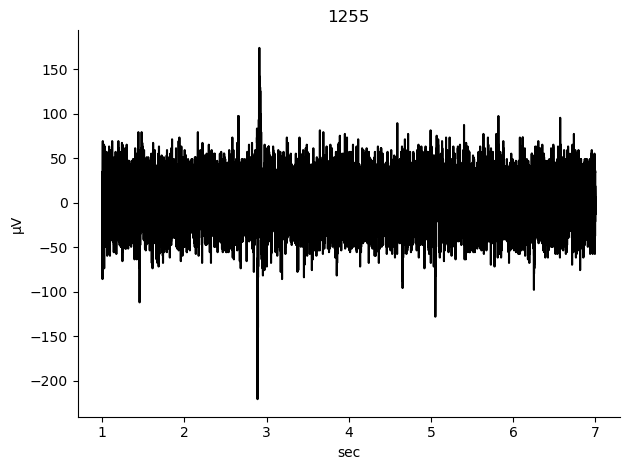

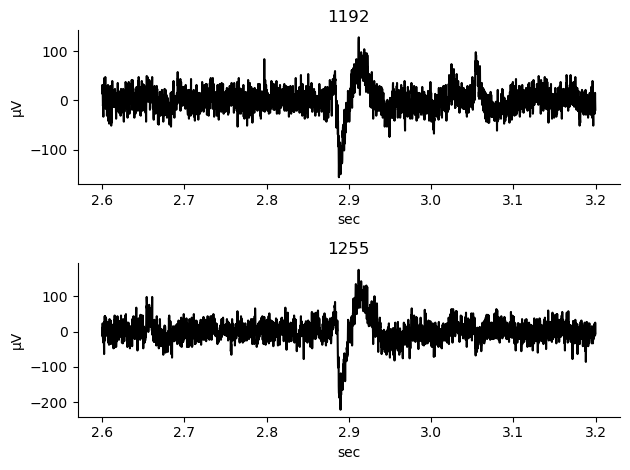

In [4]:
# using built function to visualise data

# plot a map of the MEA
Recording.plot_mea(label=[1255], background=True)

# plot the raw signal of channels 1255
Recording.plot_raw([1255])
# plot the raw signal of channels 1192 and 1255 from 2.5s to 3.2s
Recording.plot_raw([1192, 1255], t_start=2.6, t_end=3.2)

Reading chunk 1 out of 1
done


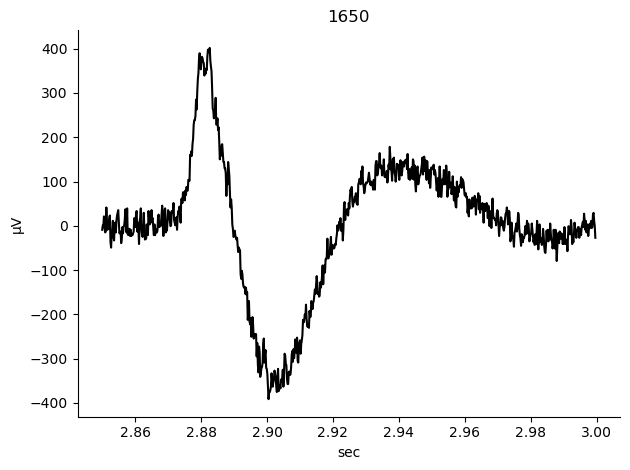

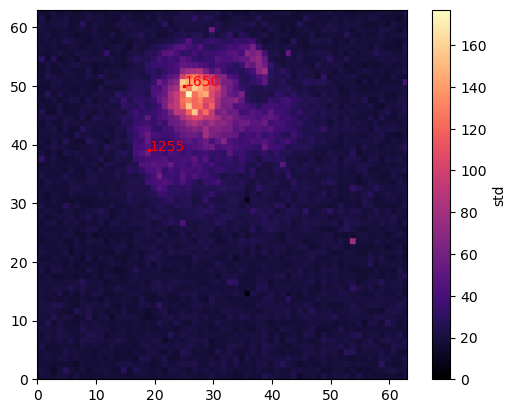

In [5]:
# extract all channels from the brw file, from 2.8s to 3s
Recording = br.read_brw_recording("../recordings/13-10_hippo-slice3_gabazine17.brw", t_start=2.85, t_end=3, ch_to_extract="all", verbose=True)

# plot the raw signal of channels 1650
Recording.plot_raw([1650])
# plot an activity map
Recording.plot_activity_map(label=[1255, 1650], method="std", cmap="magma")

In [6]:
# extract the whole recording from the brw file, extracting the channels 2098, and using the 3Brain dll
# Brainwave5 needs to be installed on this computer in order to use the 3Brain dlls
Recording = br.read_brw_recording("../recordings/13-10_hippo-slice3_gabazine17.brw", t_start=1, t_end=1.25, ch_to_extract="all", use_dll=True)
print(len(Recording.recording), "channels extracted for", len(Recording.recording[0][1])/Recording.Info.get_sampling_rate(), "seconds")

4096 channels extracted for 0.2500001981662488 seconds


In [7]:
## raw compressed format

# extract a recording from the raw compressed brw file, from 1.6s to 2.95s, extracting all channels
Recording = br.read_brw_recording("../recordings/cerebellum-slice1-01.brw", t_start=1.6, t_end=2.95, ch_to_extract="all")
# print recording type
print("Recording type:", Recording.Info.get_recording_type())


# directly access recording date from the Recording object

# recording[0] contains data for the first extracted channel
data_channel_1305 = Recording.recording[1305]

# recording[0][0] contains the id number of the first extracted channel
print("channel number:", data_channel_1305[0])
# recording[0][1] contains time series data of the first extracted channel. All snippets are stored in the same list
print("number of frames for all snippets in the recording:", len(data_channel_1305[1]))
# recording[0][2] contains a list of the first and last time frame for every snippet of the recording for first extracted channel
print("first spike snippet time frames ([first, last]):", data_channel_1305[2][0])
print("second spike snippet time frames ([first, last]):", data_channel_1305[2][1])

2 data chunks to read
Recording type: NoiseBlankingCompressionSettings
channel number: 1305
number of frames for all snippets in the recording: 1047
first spike snippet time frames ([first, last]): [35038, 35246]
second spike snippet time frames ([first, last]): [35344, 35556]


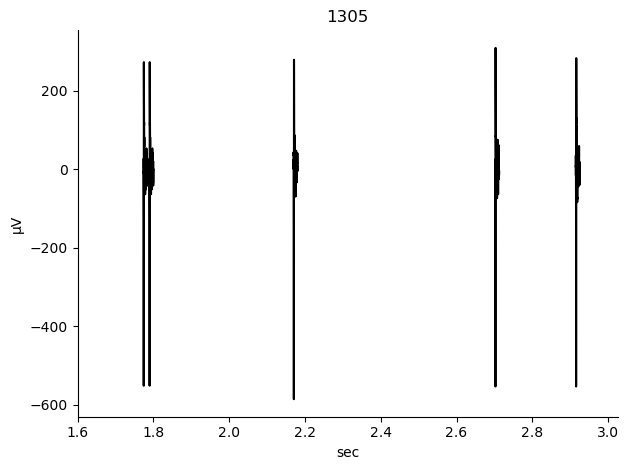

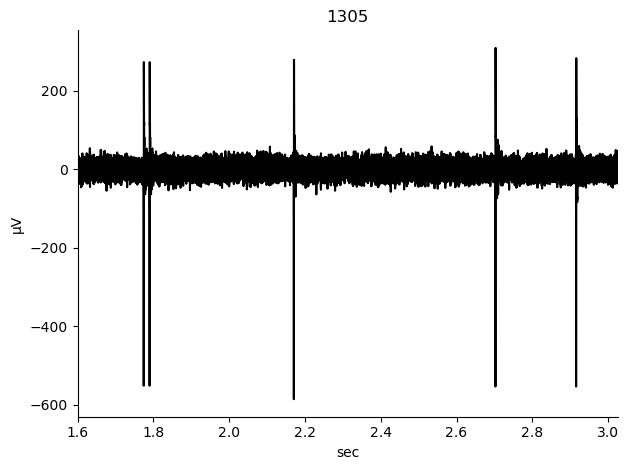

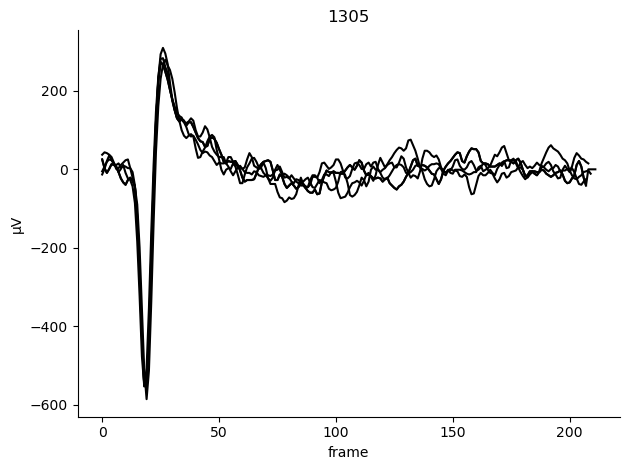

In [8]:
# plot extracted signal for channel 1305. default visualisation mode is "aligned"
Recording.plot_raw([1305], t_start=1.6, t_end="all")
# plot extracted signal for channel 1305, with visualisation mode "reconstructed", and with artificial noise
Recording.plot_raw([1305], visualisation="reconstructed", t_start=1.6, t_end="all", artificial_noise=True)
# plot extracted signal for channel 1305, with visualisation mode "superimposed"
Recording.plot_raw([1305], visualisation="superimposed", t_start=1.6, t_end="all")

5 data chunks to read


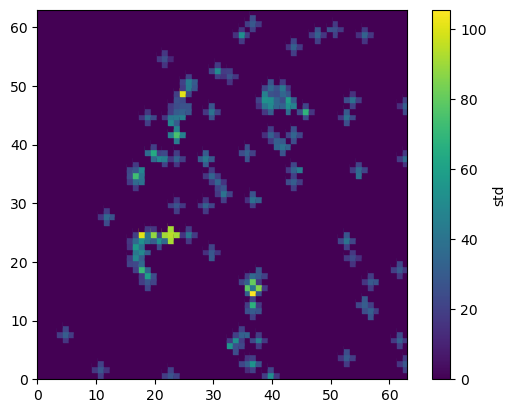

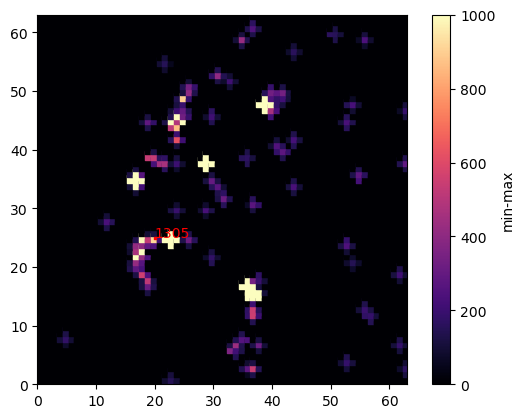

In [9]:
# extract 5 sec of recording for all channels 
Recording = br.read_brw_recording("../recordings/cerebellum-slice1-01.brw", t_start = 0, t_end = 5, ch_to_extract="all")

# plot the activity map, with default arguments
Recording.plot_activity_map()
# plot the activity for defined arguments
Recording.plot_activity_map(label=[1305], t_start=1.5, t_end=2.5, method="min-max", max_range=1000, cmap="magma")

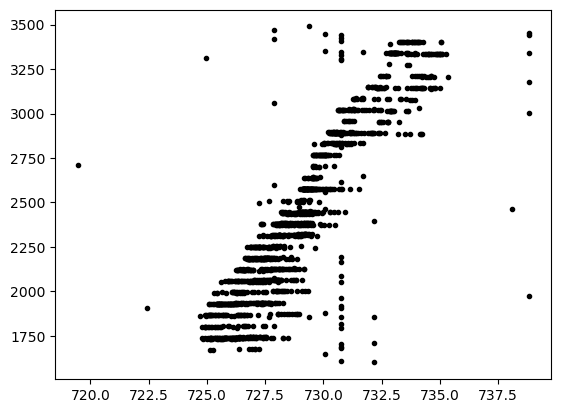

In [14]:
### read a recording from a bxr file

# import the file bxr_experiment_settings from beaf framework, used to read information from bxr files
import beaf.bxr_experiment_settings as bxe
# create an object Info containing the information from the recording
# this does not extract any traces from the recording
Info = bxe.get_bxr_experiment_setting("../recordings/cortex_slice2.bxr")
# access and print information stored in the Info object
Info.get_recording_length_sec()


# import the file bxr_recording from beaf framework, used to read and extract data from bxr files
import beaf.bxr_recording as bxr
# extract data from the bxr file, from 722s to 739s, for channels between 1600 and 3500
# this bxr file contains 
Rec = bxr.read_bxr_file("../recordings/retina-P5-waves.bxr", t_start = 722, t_end = 739, ch_to_extract=[ch for ch in range(1600, 3500)], sort=True)
# data can then be accessed directly from the Bxr_Recording object
# a Bxr_Recording object contains 2 lists: 'spike_times' and 'spike_channels', storing for each spike in the recording the spiking channel and the time of the spike
# if the argument 'sort' is set to 'True', a third list 'sorted' is initialised. This 2D list contains spike times for each channel to extract individually

# import pyplot
import matplotlib.pyplot as plt 
# loop through all channels to display a raster plot
for ch in range(0, Rec.Info.get_nb_channel()):
    plt.plot([s/Rec.Info.get_sampling_rate() for s in Rec.sorted[ch]], [ch for x in range(0, len(Rec.sorted[ch]))], '.', c='black')
plt.show()


Sampling frequency: 5543.99560546875


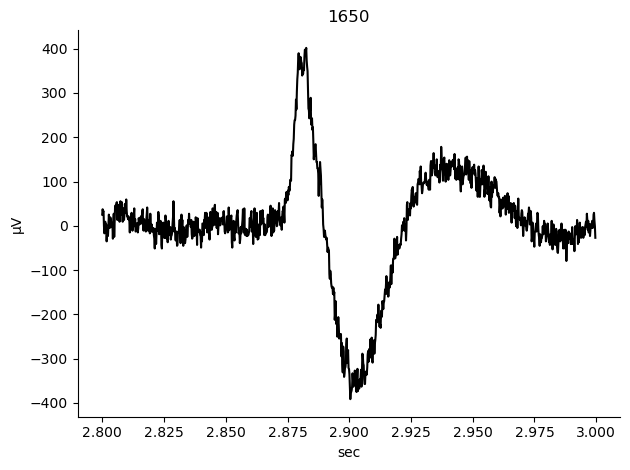

Sampling frequency: 200


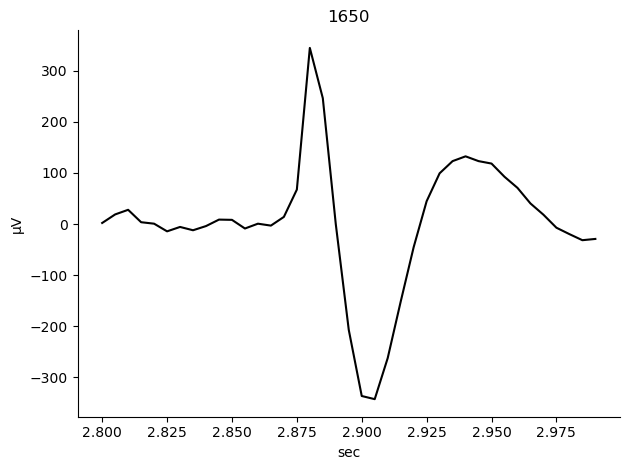

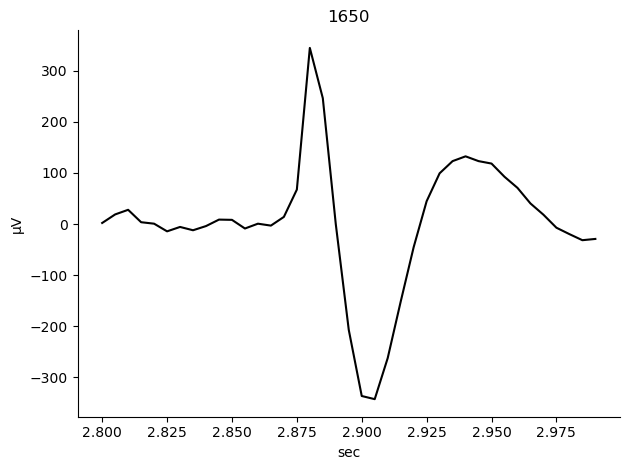

In [10]:
### down sampling
# extract channel 1650 from 2.8s to 3s
Recording = br.read_brw_recording("../recordings/13-10_hippo-slice3_gabazine17.brw", t_start=2.8, t_end=3, ch_to_extract=[1650])

print("Sampling frequency:", Recording.Info.get_sampling_rate())
# plot raw signal
Recording.plot_raw([1650])
# down sample the recording from to 200Hz, with overwrite option
Recording.down_sample(200, [1650], overwrite=True)
print("Sampling frequency:", Recording.Info.get_sampling_rate())
# plot raw signal
Recording.plot_raw([1650])


### save and load recording as pickle file
Recording.save_recording("./rec_down-sample.pickle")
# remove the Recording object
del(Recording)
# create a Recording object, loading the pickle file
Recording = br.load_recording("./rec_down-sample.pickle")
# plot raw signal
Recording.plot_raw([1650])

NumpyRecording: 4096 channels - 1 segments - 5.5kHz - 0.200s
2 data chunks to read


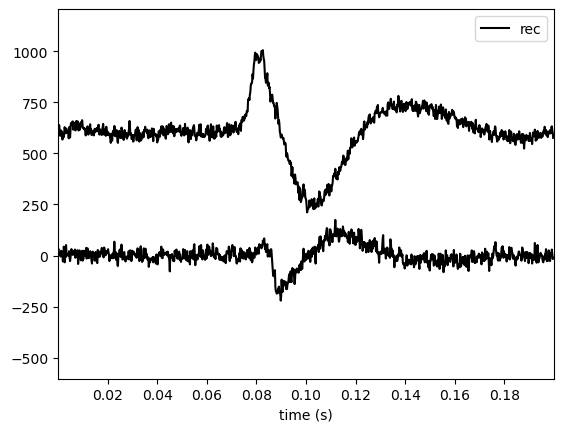

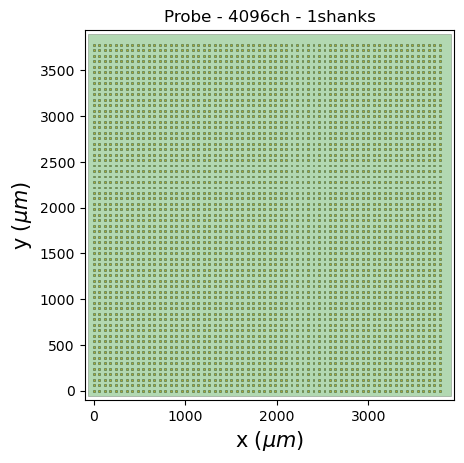

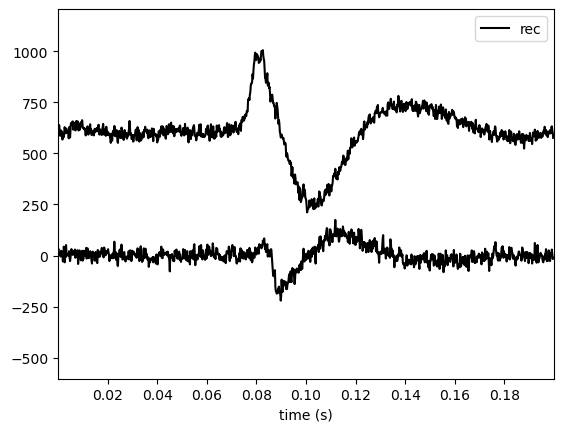

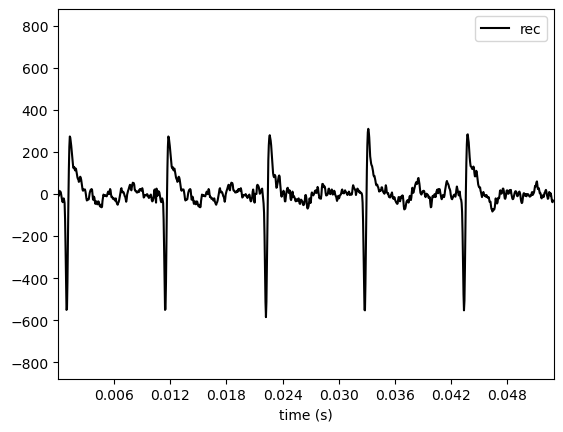

In [11]:
### SpikeInterface
# documentation about SpikeInterface can be found here: https://spikeinterface.readthedocs.io/en/latest/

# import the file brw_spikeinterface from beaf framework, used to create a SpikeInterface object from a brw file
import beaf.brw_spikeinterface as bsi
# import the file widgets from spikeinterface, used to visualise data
import spikeinterface.widgets as siw
# import plot_probe from probeinterface
from probeinterface.plotting import plot_probe

# create a SpikeInterface object from the brw file, extracting all channels for two seconds
# function from the SpikeInterface framework can be applied on this object
SIR = bsi.read_brw_SpikeInterface("../recordings/13-10_hippo-slice3_gabazine17.brw", t_start=2.8, t_end=3, ch_to_extract="all")

# print information about the recording
print(SIR)
# plot time series using SpikeInterface function, for channels 1255 and 1650
siw.plot_timeseries(SIR, time_range=(0, 0.2), channel_ids=[1255, 1650])
# plot the electrode
plot_probe(SIR.get_probe())


# extract a raw recording using beaf
Recording = br.read_brw_recording("../recordings/13-10_hippo-slice3_gabazine17.brw", t_start=2.8, t_end=3, ch_to_extract="all")
# convert a Brw_Recording (beaf) to a SpikeInterface object
SIR = bsi.get_spikeinterface_recording(Recording)
del(Recording)
# plot time series
siw.plot_timeseries(SIR, time_range=(0, 0.2), channel_ids=[1255, 1650])

# extract a raw compressed recording using beaf
Recording = br.read_brw_recording("../recordings/cerebellum-slice1-01.brw", t_start=1.6, t_end=2.95, ch_to_extract=[1305])
# convert a Brw_Recording (beaf) to a SpikeInterface object
SIR = bsi.get_spikeinterface_recording(Recording)
siw.plot_timeseries(SIR, time_range=(0, 0.053))

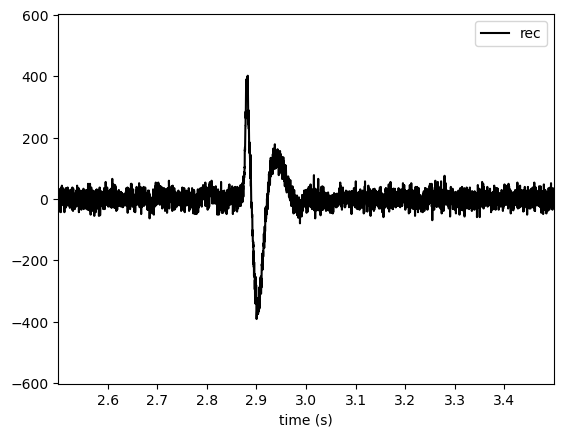

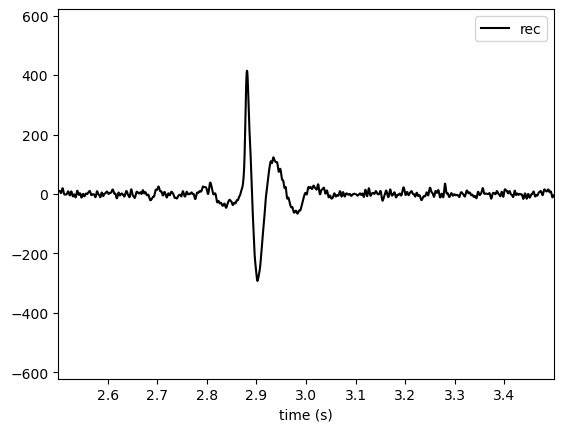

In [12]:
## create SpikeInterface recording
SIR = bsi.read_brw_SpikeInterface("../recordings/13-10_hippo-slice3_gabazine17.brw", t_start=0, t_end=8, ch_to_extract=[1650])
siw.plot_timeseries(SIR, time_range=(2.5, 3.5))

# import bandpass_filter modules from spikeinterface.preprocessing
from spikeinterface.preprocessing import bandpass_filter, common_reference

# apply a band pass filter
SIR_f = bandpass_filter(SIR, freq_min=10, freq_max=200)
# plot the filtered time serie
siw.plot_timeseries(SIR_f, time_range=(2.5, 3.5))